In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib as mpl

In [2]:
mpl.rcParams['figure.dpi']=120

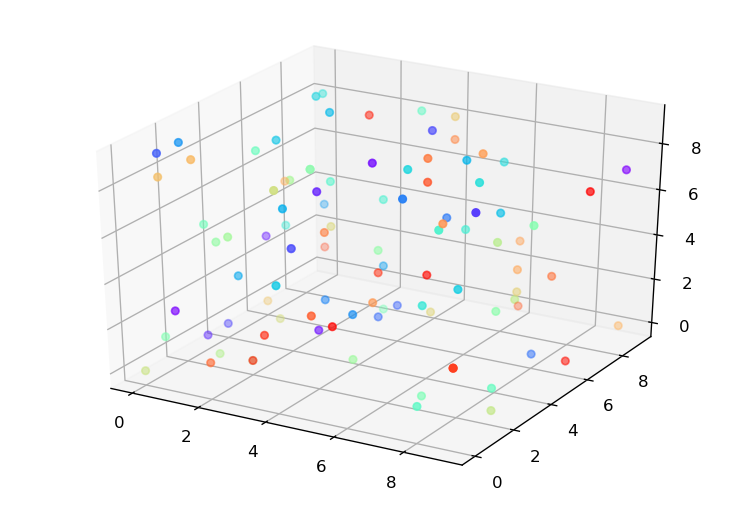

In [3]:
N=100
fig=plt.figure()
ax=Axes3D(fig)
color=cm.rainbow(np.linspace(0,1,N))

x, y, z=np.random.randint(0, 10, size=(3, N))
ax.scatter(x, y, z, c=color)

In [4]:
from matplotlib import tri

In [5]:
m, n=40, 5

In [6]:
u=np.arange(m)*2*np.pi/(m-1)
u=u*np.ones((n,1))
u=u.reshape(m*n)

In [7]:
v=np.arange(n)/(n-1)-0.5
v=v*np.ones((m, 1))
v=v.reshape(m*n, order='F')

In [8]:
x=np.cos(u)*(1+0.5*v*np.cos(0.5*u))
y=np.sin(u)*(1+0.5*v*np.cos(0.5*u))
z=0.5*v*np.sin(0.5*u)

In [9]:
surface=tri.Triangulation(u, v)

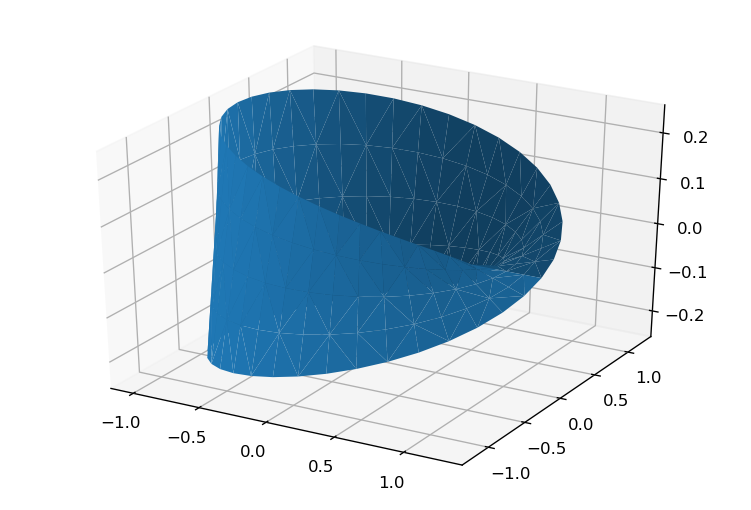

In [10]:
fig=plt.figure()
ax=Axes3D(fig)
ax.plot_trisurf(x, y, z, triangles=surface.triangles)

### write vtk file
write any surface created with `matplotlib.tri.Triangulation()` to vtk file

In [11]:
def writeVTKSurface(outFileName, x, y, z, triangles):
    nodes_number=x.size
    triangles_number=triangles.size//3
    
    file=open(outFileName, 'w')
    file.write('# vtk DataFile Version 2.0\n')
    file.write('Moebius surface\n')
    file.write('ASCII\n')
    file.write('DATASET POLYDATA\n')
    
    file.write(f'POINTS {nodes_number} float\n')
    for i in range(nodes_number):
        file.write(f'{x[i]} {y[i]} {z[i]} \n')
    
    file.write(f'POLYGONS {triangles_number} {triangles_number*4} \n')
    for i in range(triangles_number):
        file.write(f'3 {triangles[i, 0]} {triangles[i, 1]} {triangles[i, 2]} \n')
    file.close()

In [12]:
writeVTKSurface('moebius.vtk', x, y, z, surface.triangles)